<a href="https://colab.research.google.com/github/Varshika-5a4/FML/blob/main/Ridge_companydataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
temp=pd.read_csv("/content/Company_data.csv")
temp.head()
     

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
temp.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
temp.shape

(200, 4)

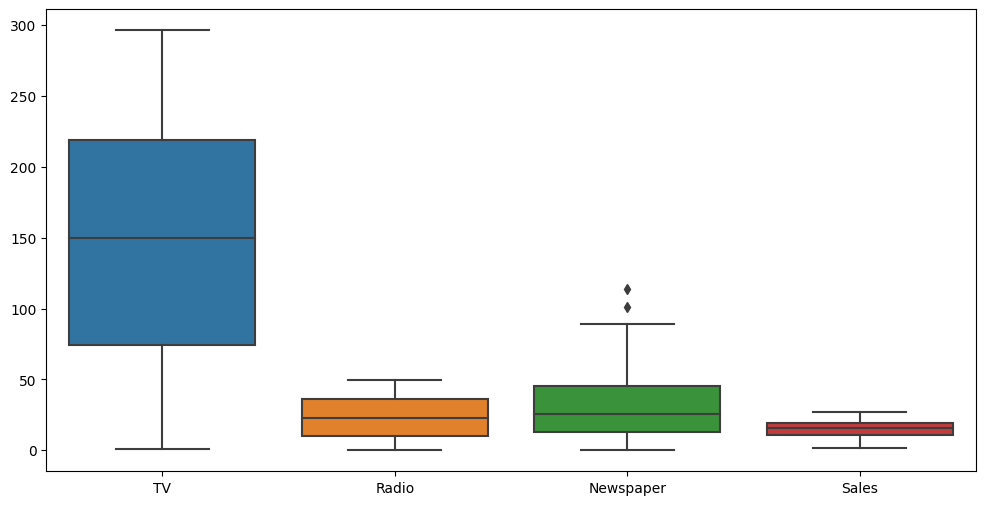

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=temp)
plt.show()

In [7]:
q1 = temp["Newspaper"].quantile(0.25)
q3 = temp["Newspaper"].quantile(0.75)
iqr=q3-q1
print(iqr)
     

32.35


In [8]:
up=q3+1.5*iqr
down=q1-1.5*iqr

print(up,down)

93.625 -35.775000000000006


In [10]:
outlier=[]
profit=temp["Newspaper"]

for i in profit:
    if i>up:
        outlier.append(i)
        print("Up Outlier",i)
        
for i in profit:
    if i<down:
        outlier.append(i)
        print("Down Outlier",i)



Up Outlier 114.0
Up Outlier 100.9


In [11]:
temp["Newspaper"]=temp["Newspaper"].replace(outlier,temp["Newspaper"].mean())
     

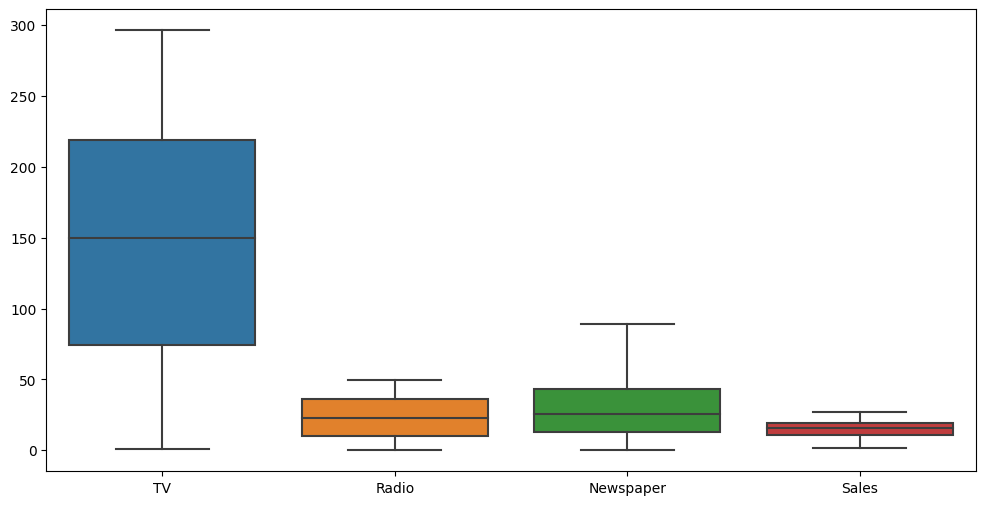

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=temp)
plt.show()
     

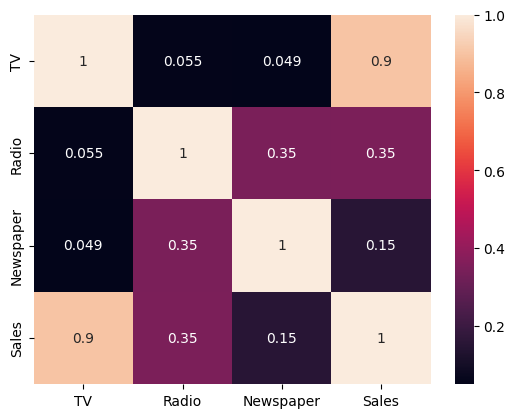

In [13]:
sns.heatmap(temp.corr(),annot=True)
plt.show()

In [14]:
X = temp['TV'].values
y = temp['Sales'].values
print(X.shape,y.shape)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(200,) (200,)
(200, 1) (200, 1)


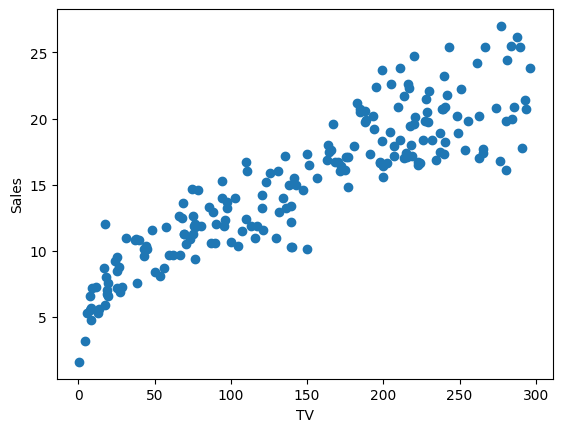

In [15]:
plt.scatter(X,y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()
     

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10,random_state=42)


In [17]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [18]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)
     

MAE : 1.8080390925144116
MSE : 5.098669893722593
RMSE : 2.2580234484439248
R2_SCORE : 0.8124420013346931


In [19]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 2.037955380087778
MSE : 6.302019191108033
RMSE : 2.510382279874528
R2_SCORE : 0.8071768664620327


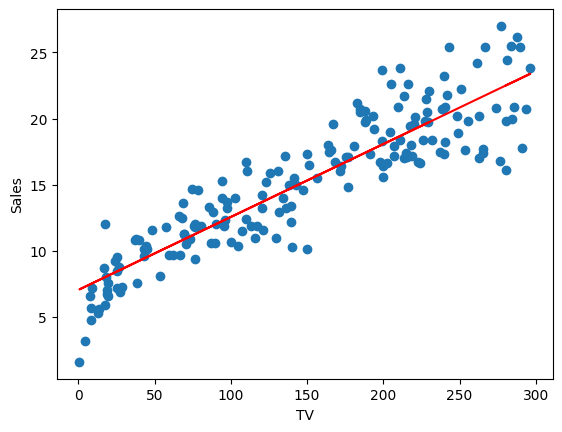

In [20]:
plt.scatter(X_train,y_train)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot(X_train,y_predict,color ='red')
plt.show()